# Inflation & Stagflation: Simple Visualization using Python

According to the World Bank’s Global Economic Prospects reports, inflation has worsened around the world and the risk of stagflation is high.

Economics terms:

**Inflation** refers to a general increase in prices and fall in the purchasing value of money.

**Stagflation** refers to persistent high inflation combined with slow growth rate and high unemployment in an economy.



# How inflation is measured?

A common inflation metric used is the percent change in Consumer Price Index (CPI)

#### Get the CPI  data 

https://fred.stlouisfed.org/series/CPIAUCSL


In [2]:

import pandas as pd 
import datetime as dt

import pandas_datareader.data as web
start = dt.datetime(2010, 7, 1)
end = dt.datetime(2022, 7, 1)
cpi = web.DataReader('CPIAUCSL', 'fred', start, end)


cpi.to_csv("cpi.csv")
cpi = pd.read_csv("cpi.csv", index_col="DATE", parse_dates=True)

cpi.tail()

,CPIAUCSL
DATE,
2022-03-01,287.708
2022-04-01,288.663
2022-05-01,291.474
2022-06-01,295.328
2022-07-01,295.271


In [3]:
#change in cpi
inflation= cpi / cpi.shift(12) * 100 - 100

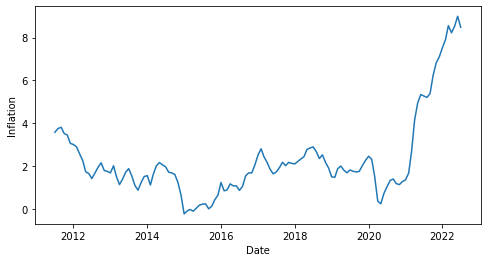

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))

plt.plot(inflation)

plt.xlabel("Date")
plt.ylabel("Inflation")

plt.show()

As the graph shows, inflation is rising!

# How is stagflation measured?

By examining the direction of several economic indicators over a period of time e.g. interest rates, unemployment are high, economic index prices.. 



### Get the economic indicators data: interest rate and unemployment


#### 1, Using API request to get interest rate and unemployment

DBnomics Web API: https://api.db.nomics.world/v22/apidocs

In [5]:
url = 'https://api.db.nomics.world/v22/series/Eurostat/ei_mfir_m/M.NSA.NAP.MF-LTGBY-RT.EU28?observations=1'

# get data from the above URL using the requests package

import requests
r = requests.get(url).json()

# Load data into a dataframe
periods = r['series']['docs'][0]['period']
values = r['series']['docs'][0]['value']
dataset = r['series']['docs'][0]['dataset_name']
interest_ts = pd.DataFrame(values,index=periods)
interest_ts.columns = [dataset]
  

interest_ts.tail()


,Interest rates - monthly data
2019-09,0.29
2019-10,0.35
2019-11,0.50
2019-12,0.55
2020-01,0.52


In [6]:
url = 'https://api.db.nomics.world/v22/series/Eurostat/une_rt_m/M.NSA.TOTAL.PC_ACT.T.EA19?observations=1'
r = requests.get(url).json()
periods = r['series']['docs'][0]['period']
values = r['series']['docs'][0]['value']
dataset = r['series']['docs'][0]['dataset_name']
unemployment = pd.DataFrame(values,index=periods)
unemployment.columns = [dataset]
  
unemployment.tail()


,Unemployment by sex and age – monthly data
2022-05,6.5
2022-06,6.4
2022-07,6.6
2022-08,6.7
2022-09,6.6


#### 2. Getting economic data from the World Bank using Pandas-datareader:

In [7]:
from pandas_datareader import wb

data = wb.download(indicator=['SL.UEM.TOTL.ZS', 'FR.INR.RINR'], country=['US'], start=2010, end=2022)

unemployment = data.unstack().T.loc['SL.UEM.TOTL.ZS']
unemployment.columns = ['Unemployment']

interest_rate = data.unstack().T.loc['FR.INR.RINR']
interest_rate.columns = ['Interest_rate']

df = interest_rate.join(unemployment)
df.tail()

,Interest_rate,Unemployment
year,,
2017,2.157870,4.360
2018,2.456470,3.900
2019,3.432389,3.670
2020,2.311078,8.050
2021,-0.869249,5.464


#### Plotting interest rate and unemployment:

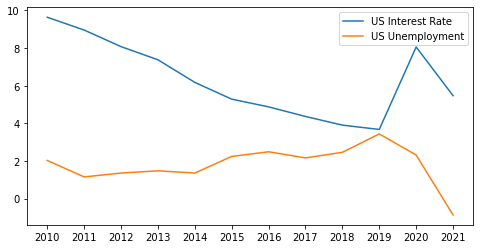

In [8]:

fig,ax = plt.subplots(figsize=(8,4))

y1 = df['Unemployment']
y2 =df['Interest_rate']

ax.plot(y1, label = "US Interest Rate")
ax.plot(y2, label = "US Unemployment")

ax.legend()
plt.show()

#save graph
fig.savefig("stagflation1.png", dpi=123)

As the graph shows we see: both the interest rate and unemployment decline since 2020

### Get index prices from yahoo:


Dow Jones Industrial Average (^DJIA) is a stock market index based on the stock prices of the 30 largest US companies 


In [10]:
import pandas_datareader as pdr
import datetime as dt

start = dt.datetime(2022, 1, 1)
end = dt.datetime(2022, 11, 7)

dow = pdr.get_data_yahoo('^DJI', start, end)['Adj Close']
dow.name='^DJI'

print(dow)

Date
2022-01-03    36585.058594
2022-01-04    36799.648438
2022-01-05    36407.109375
2022-01-06    36236.468750
2022-01-07    36231.660156
                  ...     
2022-11-01    32653.199219
2022-11-02    32147.759766
2022-11-03    32001.250000
2022-11-04    32403.220703
2022-11-07    32827.000000
Name: ^DJI, Length: 214, dtype: float64


### Plot index prices

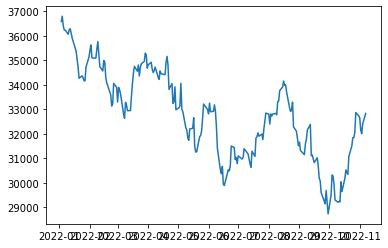

In [11]:
plt.plot(dow)

As graph shows, in 2022 the index prices are overall in decline